# Employee Burnout Prediction Notebook

This notebook walks through the process of building a machine learning model to predict employee burnout. The steps include:

1.  **Exploratory Data Analysis (EDA):** Understanding the data and relationships between variables.
2.  **Data Cleaning & Preprocessing:** Handling missing values and preparing the data for modeling.
3.  **Feature Engineering:** Creating new, meaningful features from the existing data.
4.  **Model Comparison:** Training and evaluating several models to find the best performer.
5.  **Hyperparameter Tuning:** Optimizing the best model for better performance.
6.  **Final Model Evaluation & Saving:** Training the final model and saving it as a pickle file for use in a Streamlit application.

### Step 1: Import Libraries and Load Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('enriched_employee_dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


### Step 2: Exploratory Data Analysis (EDA)

In [41]:
print("Dataset Information:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  D

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [42]:
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


We have missing values in `Resource Allocation`, `Mental Fatigue Score`, and `Burn Rate`. We'll need to handle these.

#### Visualizing Data Distributions

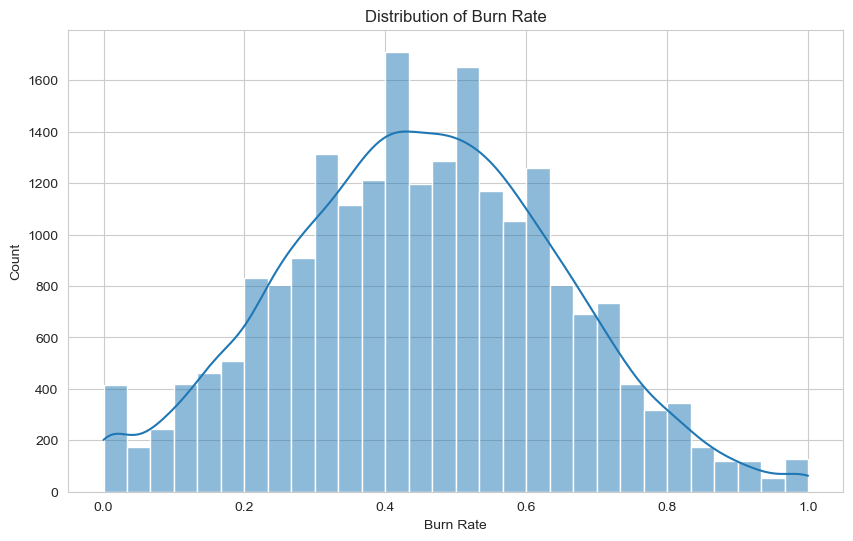

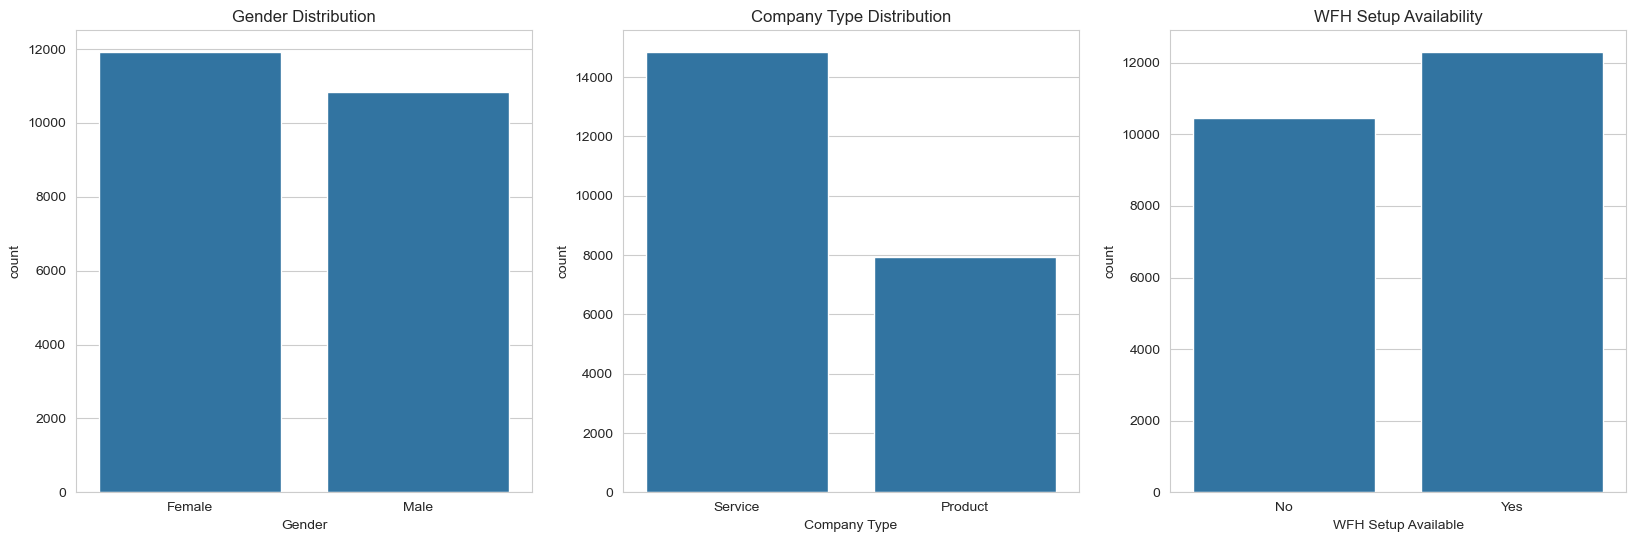

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Burn Rate'], kde=True, bins=30)
plt.title('Distribution of Burn Rate')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(ax=axes[0], x='Gender', data=df)
axes[0].set_title('Gender Distribution')
sns.countplot(ax=axes[1], x='Company Type', data=df)
axes[1].set_title('Company Type Distribution')
sns.countplot(ax=axes[2], x='WFH Setup Available', data=df)
axes[2].set_title('WFH Setup Availability')
plt.show()

#### Correlation Analysis

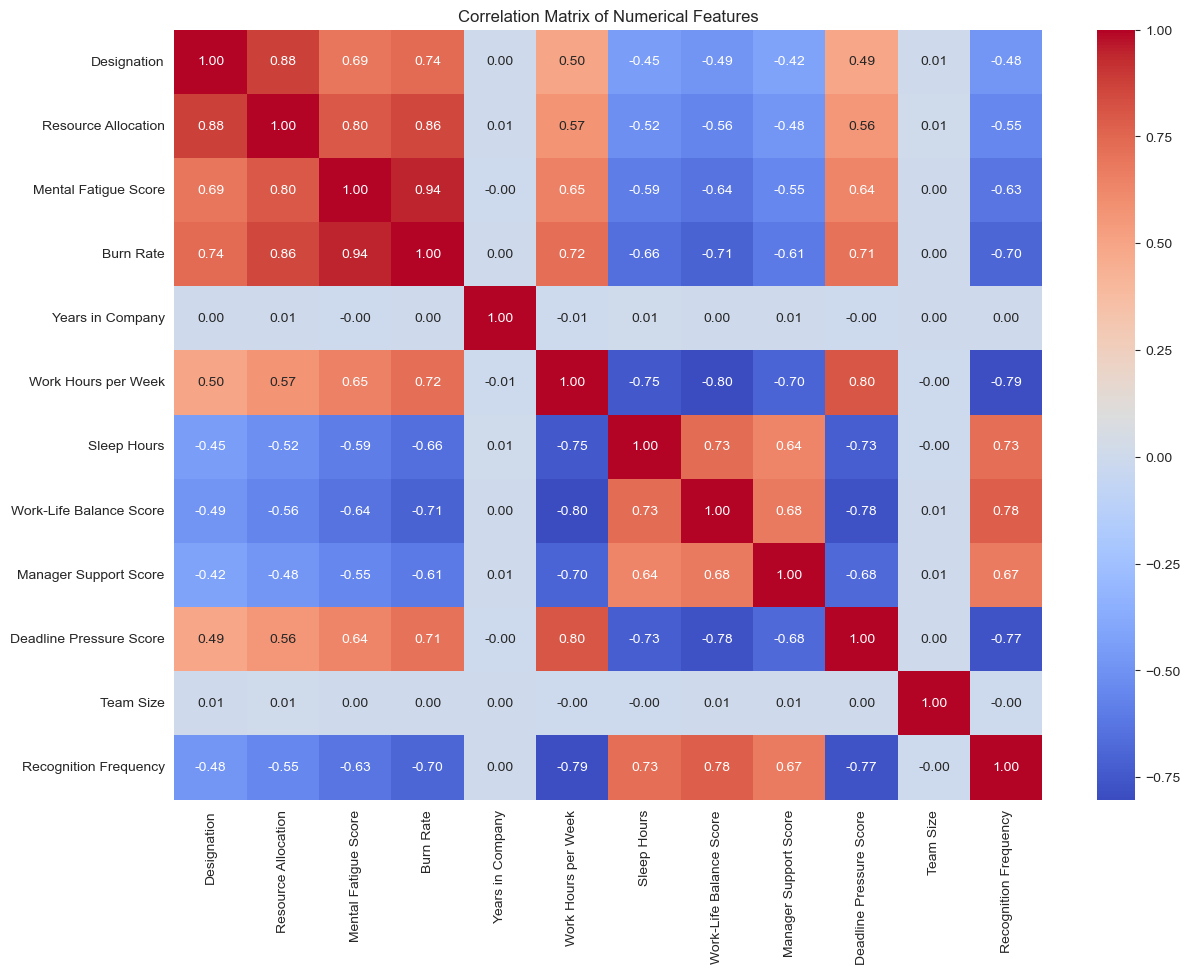

In [44]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:** `Mental Fatigue Score` and `Designation` have the strongest positive correlations with `Burn Rate`.

### Step 3: Data Cleaning & Preprocessing

In [45]:
df_cleaned = df.drop('Employee ID', axis=1)

for col in ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

Missing values after imputation:
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Years in Company           0
Work Hours per Week        0
Sleep Hours                0
Work-Life Balance Score    0
Manager Support Score      0
Deadline Pressure Score    0
Team Size                  0
Recognition Frequency      0
dtype: int64


C:\Users\A.R.I\AppData\Local\Temp\ipykernel_19920\117408490.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)


### Step 4: Feature Engineering

In [46]:
df_cleaned['Date of Joining'] = pd.to_datetime(df_cleaned['Date of Joining'])


latest_date = df_cleaned['Date of Joining'].max()

df_cleaned['Days_Since_Joining'] = (latest_date - df_cleaned['Date of Joining']).dt.days
df_engineered = df_cleaned.drop('Date of Joining', axis=1)

df_engineered = pd.get_dummies(df_engineered, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

print("Data after feature engineering and encoding:")
display(df_engineered.head())

Data after feature engineering and encoding:


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Days_Since_Joining,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2,92,False,True,False
1,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5,31,True,True,True
2,2,4.0,5.8,0.49,16,53,5.7,2,3,5,17,0,296,False,False,True
3,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2,58,True,True,True
4,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0,160,False,True,False


### Step 5: Model Preparation and Baseline Comparison

In [47]:
X = df_engineered.drop('Burn Rate', axis=1)
y = df_engineered['Burn Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (18200, 15)
Testing set shape: (4550, 15)


#### Model Training and Evaluation

We will now train several regression models to see which one performs best on our dataset out-of-the-box. We use Pipelines to bundle preprocessing (like scaling) with the model, which is a good practice to prevent data leakage.

In [48]:
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'SVR': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'R-squared': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='R-squared', ascending=False)
print("\n--- Model Comparison Results ---")
display(results_df)

Training Linear Regression...
Training SVR...
Training Random Forest...
Training Gradient Boosting...

--- Model Comparison Results ---


,Model,R-squared,MAE,MSE
3,Gradient Boosting,0.897966,0.044910,0.003673
2,Random Forest,0.893775,0.045317,0.003824
1,SVR,0.870298,0.052967,0.004669
0,Linear Regression,0.861113,0.051768,0.004999


**Result:** Based on the R-squared value, the **Gradient Boosting Regressor** is the best performing model. We will proceed with hyperparameter tuning for this model.

### Step 6: Hyperparameter Tuning (Gradient Boosting)

In [49]:
param_grid_gb = {
    'n_estimators': [900],
    'learning_rate': [0.01],
    'max_depth': [7],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}

gb_random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Running Randomized Search for Gradient Boosting...")
gb_random.fit(X_train, y_train)

print("\nBest parameters found:")
print(gb_random.best_params_)

Running Randomized Search for Gradient Boosting...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\A.R.I\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best parameters found:
{'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.01}


### Step 7: Final Model Training & Saving

In [50]:
best_model = gb_random.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("--- Tuned Model Performance ---")
print(f"R-squared: {r2_score(y_test, y_pred_tuned):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tuned):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_tuned):.4f}")

--- Tuned Model Performance ---
R-squared: 0.8996
Mean Absolute Error: 0.0444
Mean Squared Error: 0.0036


The tuned model shows a significant improvement in R-squared, indicating it explains more of the variance in the data.

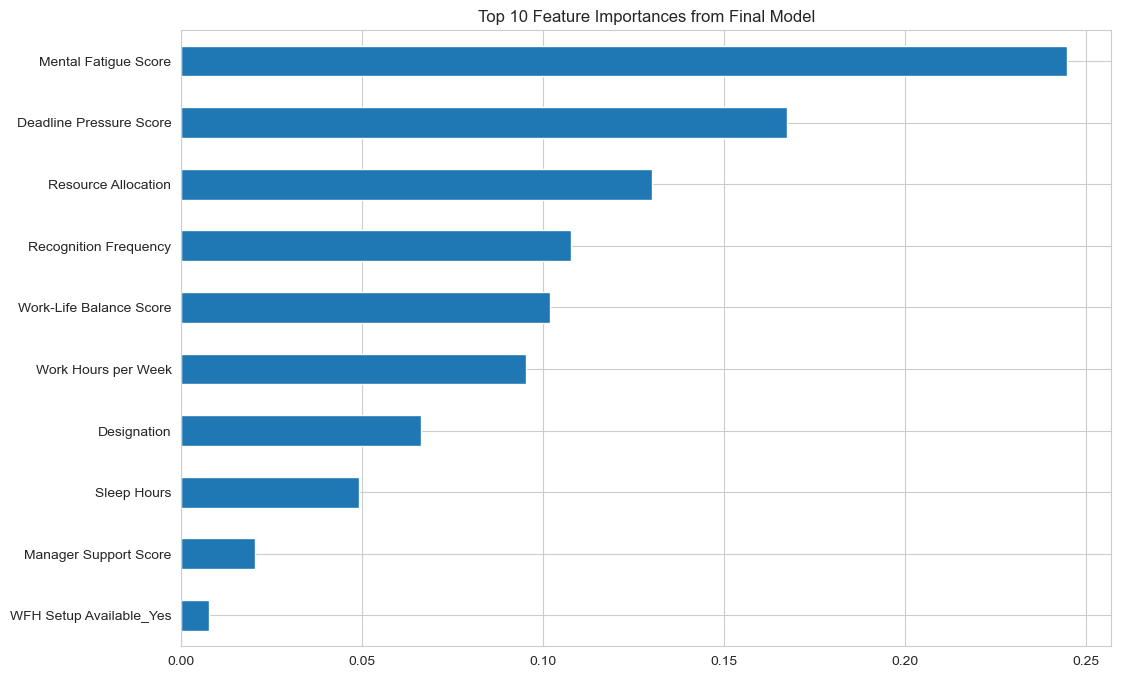

In [51]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Final Model')
plt.gca().invert_yaxis()
plt.show()

#### Save the Model and Columns

In [52]:
model_data = {
    'model': best_model,
    'columns': X.columns
}

# Save to a pickle file
with open('employee_burnout_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Final model and column names saved to 'employee_burnout_model.pkl'")

Final model and column names saved to 'employee_burnout_model.pkl'
